# Evaluación de un Modelo de Regresión Logística

En esta lámina realizaremos un modelo de "regresión logística" y se lo aplicaremos a un dataset llamado "Heart Disease UCI". Se trata de determinar qué tan efectivo resulta ser el modelo para predecir correctamente si una persona está o no en riesgo de padecer un ataque cardíaco.

In [1]:
# Importamos las librerías necesarias

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Leemos el archivo
heart = pd.read_csv('C:\\Users\\Luis Carlos\\Documents\\CSVs\\heart.csv')

In [3]:
# Mostramos la tabla
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


La tabla consiste en una serie de características (algunas numéricas, otras de clasificación), las cuales son: 
1. age: edad
2. sex: sexo
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldspeak: oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
# Vemos la forma de la tabla
heart.shape

(303, 14)

Es decir, tenemos una tabla de 303 registros o filas y 14 columnas.

In [5]:
# Vemos el tipo de dato de cada columna
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

En este caso, nuestra tabla ya está trabajada, lo que quiere decir que no necesitamos modificarla. 

In [6]:
# Mostramos qué proporción de los valores 0 y 1 hay en la tabla
heart['target'].value_counts(True)

1    0.544554
0    0.455446
Name: target, dtype: float64

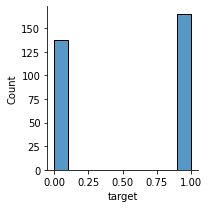

In [7]:
# Visualizamos gráficamente esta proporción
import seaborn as sns
sns.displot(heart['target'], height=3)

In [8]:
# Importamos la regresión, la partición (entrenamiento y prueba) y las métricas

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
# Mostramos las columnas
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# Seleccionamos la variable objetivo que es 'target' y las demás columnas como variables independientes
variables_independientes = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

variable_objetivo = heart['target']

In [11]:
# Particionamos la tabla (80% entrenamiento, 20% prueba)
X = variables_independientes
y = variable_objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Creamos el modelo
modelo = LogisticRegression(solver="liblinear")

El parámetro solver="liblinear" se utiliza para cuando tu clasificación sólo puede tomar 2 valores (en este caso, 0 y 1). Si no incluyes el parámetro antes mencionado entonces el programa lo interpreta como si tuvieras una clasificación multiclase.

In [13]:
#Entrenamos el modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
# Hacemos el predict
predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

In [15]:
# Función para comparar los valores reales vs los predichos

def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales, predicciones)[:15]

[(0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1)]

Este tipo de clasificación nos lleva a computar 4 tipos de observaciones:
    - Verdaderos Positivos
    - Verdaderos Negativos
    - Falsos Positivos
    - Falsos Negativos

In [16]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])
    
def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)    
))


Verdaderos Positivos: 28
Verdaderos Negativos: 25
Falsos Positivos: 4
Falsos Negativos: 4



In [17]:
# Para la exactitud:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(clases_reales, predicciones)

0.8688524590163934

In [18]:
# También se puede hacer desde sklearn como:
metrics.accuracy_score(clases_reales, predicciones)

0.8688524590163934

In [19]:
#Para la precisión (para binaria):
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    try:
        return vp / (vp+fp)
    except ZeroDivisionError:
        pass

precision(clases_reales, predicciones)

0.875

In [20]:
# Desde sklearn (para multiclase):
metrics.average_precision_score(clases_reales, predicciones)

0.8311987704918032

In [21]:
# Para sensibilidad:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

sensibilidad(clases_reales, predicciones)

0.875

In [22]:
# Desde sklearn:
metrics.recall_score(clases_reales, predicciones)

0.875

In [23]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [24]:
# Para el F1 Score:

def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

puntuacion_f1(clases_reales, predicciones)

0.875

In [25]:
metrics.f1_score(clases_reales, predicciones)

0.875

In [26]:
# Ratio de falsa alarma
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
fpr(clases_reales, predicciones)

0.13793103448275862

Procedemos a realizar una tabla con los valores reales y los valores predichos, y sus correpondientes probabilidades de obtenerlos.

In [27]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                    "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [28]:
# Vemos los primeros 10 resultados
df.head(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
179,0,0,0.922471,0.077529,1.0
228,0,1,0.261241,0.738759,1.0
111,1,1,0.144342,0.855658,1.0
246,0,0,0.971653,0.028347,1.0
60,1,1,0.060461,0.939539,1.0
9,1,1,0.087088,0.912912,1.0
119,1,1,0.411259,0.588741,1.0
223,0,0,0.998248,0.001752,1.0
268,0,0,0.994980,0.005020,1.0
33,1,0,0.531011,0.468989,1.0


In [29]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [30]:
predicciones_probabilidades[:10]

array([[0.92247083, 0.07752917],
       [0.26124107, 0.73875893],
       [0.14434164, 0.85565836],
       [0.97165312, 0.02834688],
       [0.06046099, 0.93953901],
       [0.08708764, 0.91291236],
       [0.41125889, 0.58874111],
       [0.99824786, 0.00175214],
       [0.99497986, 0.00502014],
       [0.53101074, 0.46898926]])

In [31]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.90)[:10]

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

El umbral nos permite asegurarnos de que todo aquél con una probabilidad de tener un problema cardíaco mayor a 90% se clasificará como 1, de lo contrario como 0. El umbral por defecto es 0.5, es decir, la probabilidad por encima de 0.5 la clasifica como 1 y aquellas por debajo de 0.5 las clasifica como 0.

In [32]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral

rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

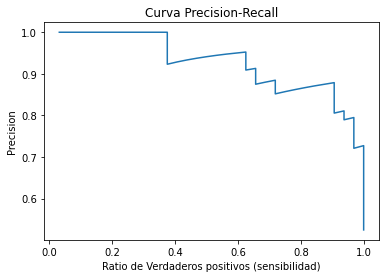

In [33]:
#Visualizamos la curva Precision-Recall

plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

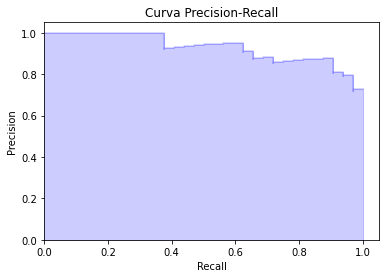

In [34]:
# Visualizamos el área bajo la curva Precision-Recall

def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)
# Recall es sensibilidad

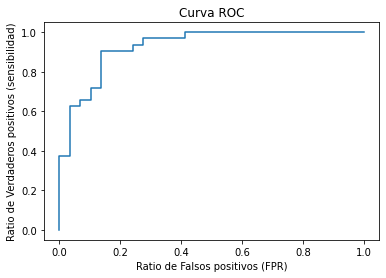

In [35]:
#Visualizamos la Curva ROC

plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");

La Curva ROC es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. Entre más se asemeje la figura a un cuadrado, mejor es el modelo.

In [36]:
metrics.roc_auc_score(clases_reales, predicciones)

0.8685344827586206

La métrica roc auc representa el área bajo la Curva ROC; debe de ser cercana a 1 para tener un modelo más confiable.

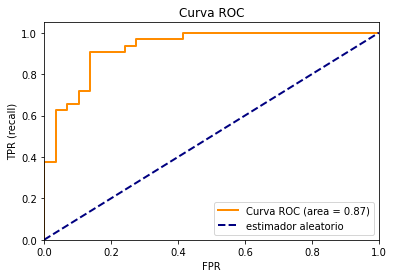

In [37]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

El modelo será mejor entre más por encima de la diagonal se encuentre la Curva ROC.

In [38]:
# Evaluamos qué tan bueno (o malo) fue nuestro modelo 
    
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.869
    Precisión: 0.831
    Sensibilidad: 0.875
    Area bajo curva (AUC): 0.869
    Puntuación F1: 0.875
    


Todos estos parámetros deben de aproximar su valor a 1. En este caso podemos decir que nuetro modelo fue muy bueno, más no excelente. De haber sido excelente, nuestros valores anteriores deberían haber estado por encima de 0.90.